In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [89]:
def show_img(img):
    fig = plt.figure(figsize=(11, 11), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(img)

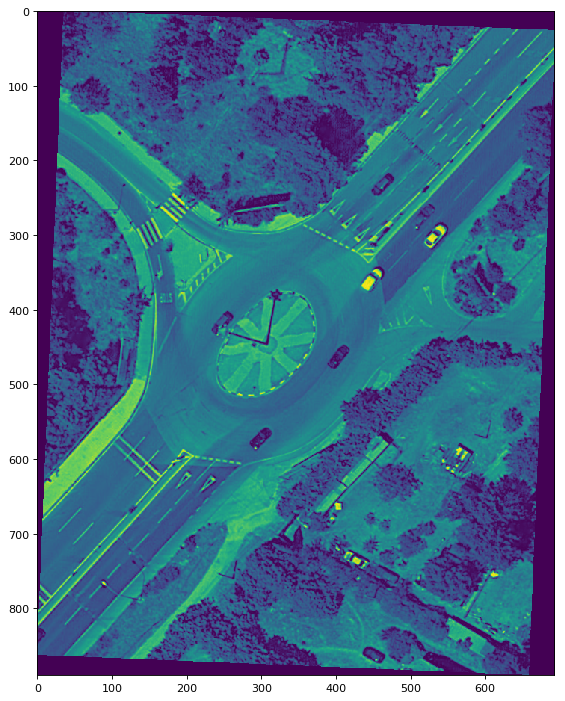

In [258]:
img = cv2.imread('../data/p0068.png')#parameters was tuned by hand on p0070
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(gray)

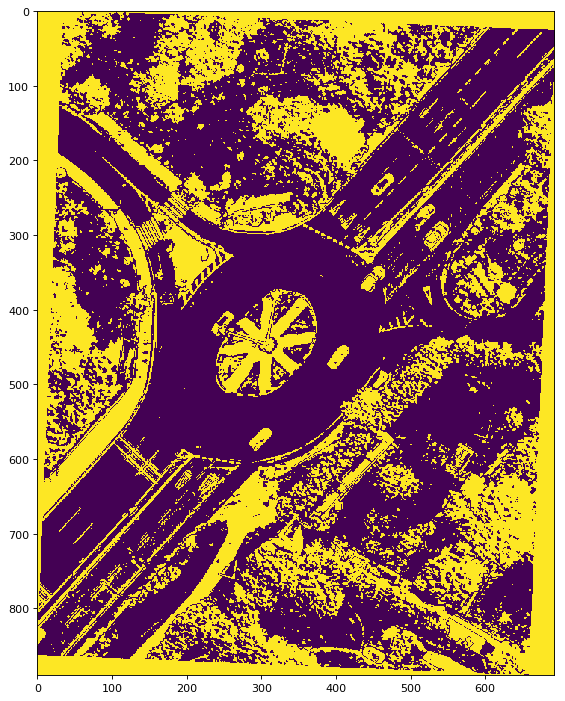

In [259]:
bgc = np.median(gray)
low, high = 0.7*bgc, 1.6*bgc

def trinary(gray, low, high):
    _, one = cv2.threshold(gray, low, 100, cv2.THRESH_BINARY)
    _, two = cv2.threshold(gray, high, 255, cv2.THRESH_BINARY)
    return one

_, one = cv2.threshold(gray, low, 100, cv2.THRESH_BINARY)
_, two = cv2.threshold(gray, high, 100, cv2.THRESH_BINARY)
t = np.add(one , two)
res = np.zeros(t.shape)
res[t==0]= 1
res[t==200]= 1
show_img(res)



In [260]:
#res
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(res.astype(np.uint8), 4,cv2.CV_32S)
label_info = {}
for i in range(0, len(stats)):
    label_info[i]= stats[i,:]

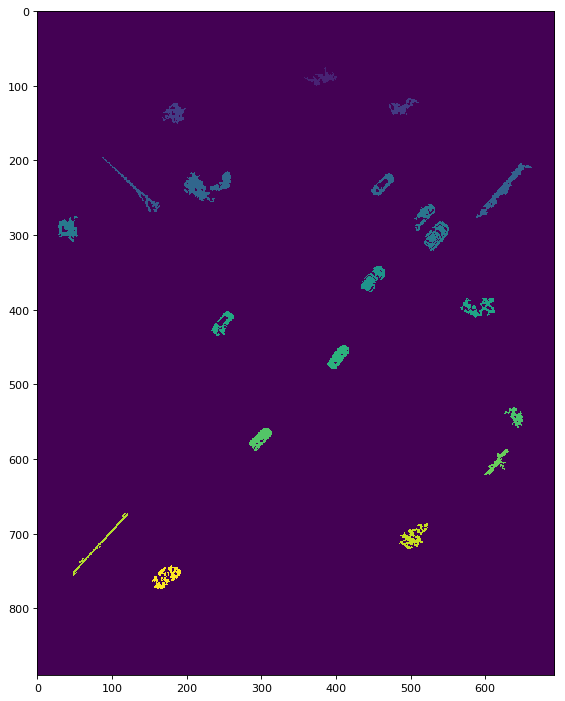

In [261]:
l, r = 300, 800
selected_labels = []
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
        lab = labels[i][j]
        if lab > 0:
            if l > label_info[lab][4] or label_info[lab][4] > r:
                labels[i][j]= 0
            else:
                selected_labels.append(lab)

            
show_img(labels)

In [262]:
not_car = []
selected_labels= set(selected_labels)

for lab in selected_labels:
    max_side_size = np.sqrt(label_info[lab][4])* 2
    if  max(label_info[lab][2:4]) > max_side_size:
        not_car.append(lab)

for nc in not_car:
    selected_labels.remove(nc)
    

cars = np.zeros(labels.shape)
for carl in selected_labels:
    cars[labels == carl]= 1



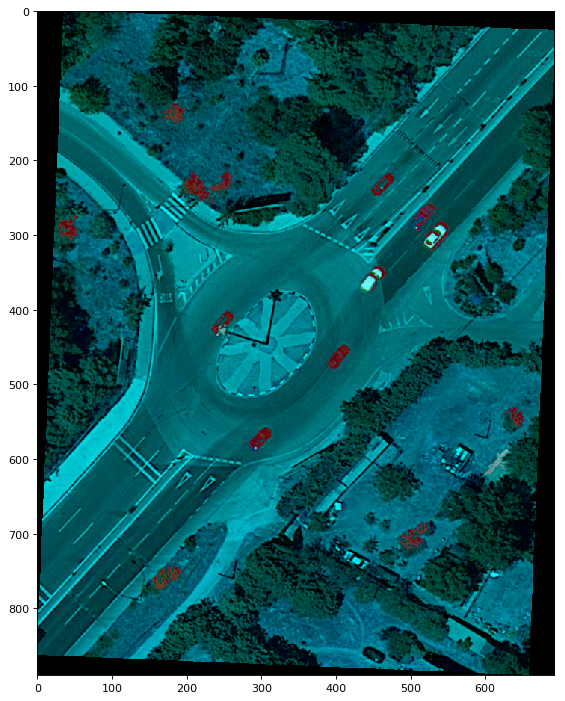

In [270]:
img[:,:,0]= cars*100
show_img(img )